In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [48]:
Atletas_Eventos_df = pd.read_csv("athlete_events.csv")
Regiones_df = pd.read_csv("noc_regions.csv")

In [49]:
Summer_Games=Atletas_Eventos_df[Atletas_Eventos_df['Season']=='Summer']

In [50]:
Summer_Games

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [51]:
print(pysqldf('''SELECT Sex,
                        COUNT(*),            
                        COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM Summer_Games
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     59443  26.709713
1   M    163109  73.290287


In [52]:
Winter_Games=Atletas_Eventos_df[Atletas_Eventos_df['Season']=='Winter']

In [53]:
Winter_Games

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [54]:
print(pysqldf('''SELECT Sex,
                        COUNT(*),            
                        COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM Winter_Games
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     15079  31.049749
1   M     33485  68.950251


In [55]:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM Summer_Games
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  23.660997   168.169025    60.087644
1   M  26.443944   178.901874    75.604195


In [56]:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM Winter_Games
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  24.014398   166.528250    59.755156
1   M  25.504261   178.668699    76.357058


In [62]:
#Summer Olympics:
summer_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               Summer_Games
                             GROUP BY
                               Year 
                        )new_table
                       ''')

In [63]:
#Winter Olympics:
winter_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               Winter_Games
                             GROUP BY
                               Year 
                        )new_table
                       ''')

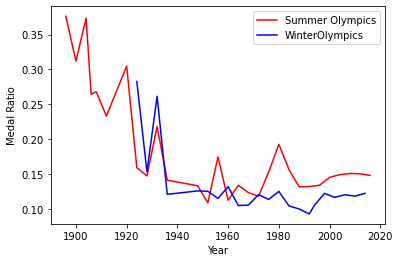

In [64]:
plt.plot(summer_medals.Year, summer_medals.medal_ratio, color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Year, winter_medals.medal_ratio, color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Medal Ratio")
plt.legend()

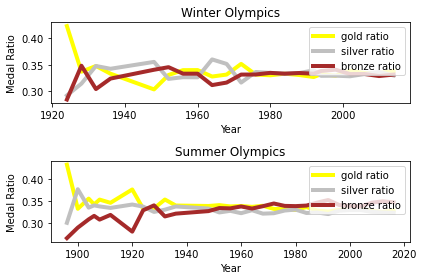

In [65]:
fig, ax = plt.subplots(2)
ax[0].plot(winter_medals.Year, winter_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[0].plot(winter_medals.Year, winter_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[0].plot(winter_medals.Year, winter_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
ax[0].legend(loc=1)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Medal Ratio")
ax[0].set_title("Winter Olympics")
ax[1].plot(summer_medals.Year, summer_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[1].plot(summer_medals.Year, summer_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[1].plot(summer_medals.Year, summer_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
plt.legend(loc=1)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Medal Ratio")
ax[1].set_title("Summer Olympics")
plt.tight_layout()

The relative percentages of medals have also stabilized, depending on the events of the Summer Olympics and the Winter Olympics, it is necessary to denote that athletes have different abilities, in some cases age, weight and height mark a difference.


In [66]:
m_f_ratio_summer = pysqldf('''SELECT 
                        Year,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM Summer_Games
                     GROUP BY Year
                    ''')

m_f_ratio_winter = pysqldf('''SELECT 
                        Year,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM Winter_Games
                     GROUP BY Year
                    ''')

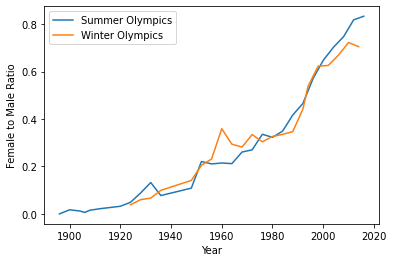

In [67]:
plt.plot(m_f_ratio_summer.Year, m_f_ratio_summer.Ratio,label="Summer Olympics")
plt.plot(m_f_ratio_winter.Year, m_f_ratio_winter.Ratio,label="Winter Olympics")
plt.xlabel("Year")
plt.ylabel("Female to Male Ratio")
plt.legend()